Chapter 28
# 可视化细高矩阵奇异值分解
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 创建数据

In [2]:
x1 = np.arange(-5, 5 + 1, step=1)
x2 = np.arange(-5, 5 + 1, step=1)

XX1,XX2 = np.meshgrid(x1,x2)
X = np.column_stack((XX1.ravel(),XX2.ravel()))

colors = np.arange(len(x1) * len(x2))

## 二维散点

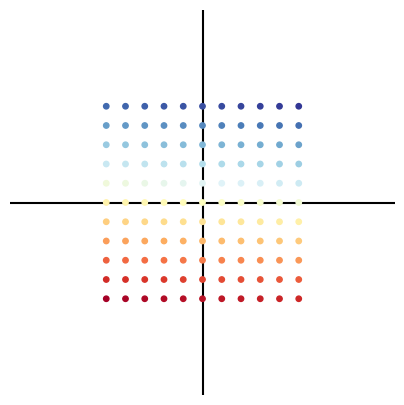

In [3]:
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(XX1.ravel(), XX2.ravel(), c = colors, s = 15, cmap = 'RdYlBu', zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# fig.savefig('Figures/SVD, 原始网格.svg', format='svg')

## 定义矩阵A

In [4]:
# A = np.array([[0, 0],
#               [1, -0.5],
#               [1, -0.5]])

A = np.array([[0, 1],
              [1, 1],
              [1, 0]])

In [5]:
from sympy import Matrix
A_ = Matrix(A)
U__, S__, V__ = A_.singular_value_decomposition()
# 注意，并非完全SVD分解，不同于后文的SVD分解结果

In [6]:
U__

Matrix([
[ sqrt(2)/2, sqrt(6)/6],
[         0, sqrt(6)/3],
[-sqrt(2)/2, sqrt(6)/6]])

In [7]:
S__

Matrix([
[1,       0],
[0, sqrt(3)]])

In [8]:
V__
# 约定成俗，准确来说是V的转置

Matrix([
[-sqrt(2)/2, sqrt(2)/2],
[ sqrt(2)/2, sqrt(2)/2]])

## 用矩阵A完成映射

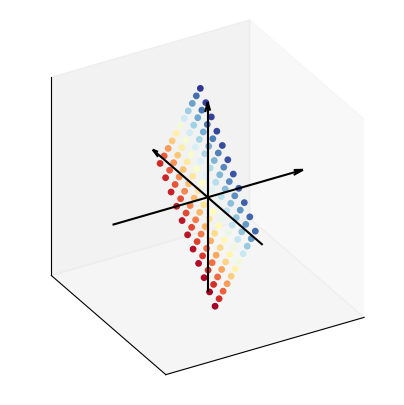

In [9]:
Z = X@A.T;

ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))
ZZ3 = Z[:,2].reshape((len(x1), len(x2)))

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(ZZ1, ZZ2, ZZ3, c = colors, s = 15, cmap = 'RdYlBu', alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-10,0,0],[0,-10,0],[0,0,-10]])
u, v, w = np.array([[20,0,0],[0,20,0],[0,0,20]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
# fig.savefig('Figures/SVD，变换后.svg', format='svg')

## 奇异值分解

In [10]:
U,S,VT = np.linalg.svd(A, full_matrices=True)
V = VT.T
S = np.diag(S)
S = np.vstack((S,np.array([[0,0]])))

# A = U @ S @ VT
# AT = V @ ST @ UT

array([[1.73205081, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.        ]])

## 平面旋转

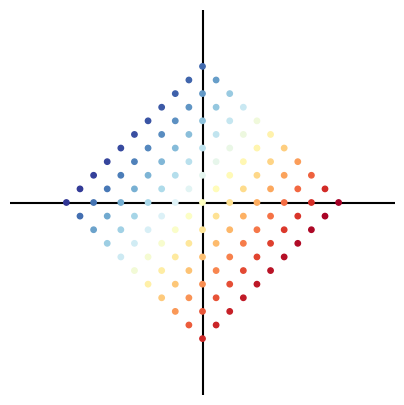

In [11]:
Z = X@V
ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))

fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(ZZ1.ravel(), ZZ2.ravel(), c = colors, s = 15, cmap = 'RdYlBu', zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# fig.savefig('Figures/SVD, V旋转.svg', format='svg')

## 缩放 + 升维

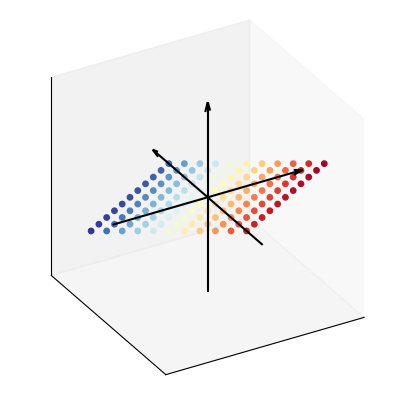

In [14]:
Z = X@V@S.T
ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))
ZZ3 = Z[:,2].reshape((len(x1), len(x2)))

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(ZZ1, ZZ2, ZZ3, c = colors, s = 15, cmap = 'RdYlBu', alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-10,0,0],[0,-10,0],[0,0,-10]])
u, v, w = np.array([[20,0,0],[0,20,0],[0,0,20]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")

# fig.savefig('Figures/SVD，V旋转-S缩放.svg', format='svg')

In [15]:
Z
# 增加了一列 0

array([[ 1.22474487e+01, -8.88178420e-16,  0.00000000e+00],
       [ 1.10227038e+01, -7.07106781e-01,  0.00000000e+00],
       [ 9.79795897e+00, -1.41421356e+00,  0.00000000e+00],
       [ 8.57321410e+00, -2.12132034e+00,  0.00000000e+00],
       [ 7.34846923e+00, -2.82842712e+00,  0.00000000e+00],
       [ 6.12372436e+00, -3.53553391e+00,  0.00000000e+00],
       [ 4.89897949e+00, -4.24264069e+00,  0.00000000e+00],
       [ 3.67423461e+00, -4.94974747e+00,  0.00000000e+00],
       [ 2.44948974e+00, -5.65685425e+00,  0.00000000e+00],
       [ 1.22474487e+00, -6.36396103e+00,  0.00000000e+00],
       [-1.53837015e-15, -7.07106781e+00,  0.00000000e+00],
       [ 1.10227038e+01,  7.07106781e-01,  0.00000000e+00],
       [ 9.79795897e+00, -8.88178420e-16,  0.00000000e+00],
       [ 8.57321410e+00, -7.07106781e-01,  0.00000000e+00],
       [ 7.34846923e+00, -1.41421356e+00,  0.00000000e+00],
       [ 6.12372436e+00, -2.12132034e+00,  0.00000000e+00],
       [ 4.89897949e+00, -2.82842712e+00

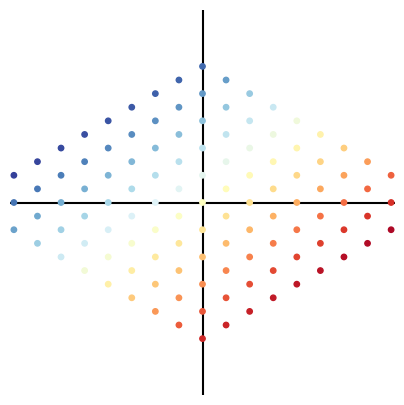

In [17]:
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(Z[:,0], Z[:,1], c = colors, s = 15, cmap = 'RdYlBu', zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('Figures/SVD，V旋转-S缩放，平面上看.svg', format='svg')

## 再次旋转，三维空间

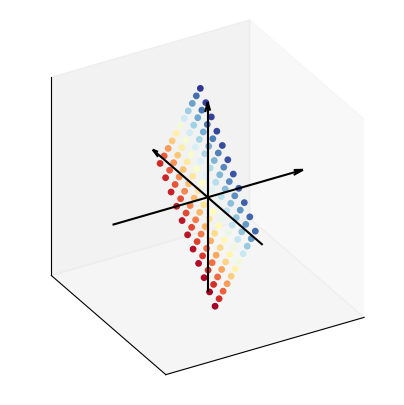

In [13]:
Z = X@V@S.T@U.T
ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))
ZZ3 = Z[:,2].reshape((len(x1), len(x2)))

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(ZZ1, ZZ2, ZZ3, c = colors, s = 15, cmap = 'RdYlBu', alpha = 1) 

ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-10,0,0],[0,-10,0],[0,0,-10]])
u, v, w = np.array([[20,0,0],[0,20,0],[0,0,20]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
# ax.set_axis_off()

# fig.savefig('Figures/SVD，V旋转-S缩放-UT旋转.svg', format='svg')